In [1]:
# Import the requests library.
import pandas as pd
import requests 
import json 

# Set the request parameters.

app_token = 'HXzjMR36MOwoQwjkMBYiTtL5y'  

api_endpoint = 'https://data.cdc.gov/resource/5hba-acwf.json'  

headers = {
    'X-App-Token': app_token,  
    'Content-Type': 'application/json'}

# Make the HTTP request.

response = requests.get(api_endpoint, headers=headers)  

response.json()  

# Print the JSON response from the API call.

print(json.dumps(response.json(), indent=4, sort_keys=True))

[
    {
        "datasource": "NVSS",
        "datavalue": "251",
        "datavaluealt": "251",
        "datavaluetype": "Number",
        "datavaluetypeid": "NMBR",
        "locationabbr": "MA",
        "locationdesc": "Massachusetts",
        "locationid": "25",
        "question": "Chronic liver disease mortality",
        "questionid": "ALC6_0",
        "stratification1": "Female",
        "stratificationcategory1": "Gender",
        "stratificationcategoryid1": "GENDER",
        "stratificationid1": "GENF",
        "topic": "Alcohol",
        "topicid": "ALC",
        "yearend": "2017",
        "yearstart": "2017"
    },
    {
        "datasource": "NVSS",
        "datavaluefootnote": "Data not shown because of too few respondents or cases",
        "datavaluefootnotesymbol": "~",
        "datavaluetype": "Age-adjusted Rate",
        "datavaluetypeid": "AGEADJRATE",
        "datavalueunit": "cases per 100,000",
        "locationabbr": "NM",
        "locationdesc": "New Mexico",
 

In [2]:
data = response.json()

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Select the relevant columns for your analysis
df = df[['locationdesc', 'yearend', 'datavalue', 'question']]

# Optionally, rename the columns
df.columns = ['State', 'Year', 'ALC Rate (%)', 'Question']

# Now df is the DataFrame containing the required information
print(df.head())

           State  Year ALC Rate (%)                         Question
0  Massachusetts  2017          251  Chronic liver disease mortality
1     New Mexico  2012          NaN  Chronic liver disease mortality
2       Colorado  2015         18.8     Alcohol use before pregnancy
3         Hawaii  2020          NaN  Chronic liver disease mortality
4       Illinois  2013          NaN          Alcohol use among youth


In [3]:
df['ALC Rate (%)'] = pd.to_numeric(df['ALC Rate (%)'], errors='coerce')


In [4]:
# fill NaN values with 0
df.fillna(0, inplace=True)
df.head()

,State,Year,ALC Rate (%),Question
0,Massachusetts,2017,251.0,Chronic liver disease mortality
1,New Mexico,2012,0.0,Chronic liver disease mortality
2,Colorado,2015,18.8,Alcohol use before pregnancy
3,Hawaii,2020,0.0,Chronic liver disease mortality
4,Illinois,2013,0.0,Alcohol use among youth


In [5]:
# set state as index
df = df.set_index("State")
df

,Year,ALC Rate (%),Question
State,,,
Massachusetts,2017,251.0,Chronic liver disease mortality
New Mexico,2012,0.0,Chronic liver disease mortality
Colorado,2015,18.8,Alcohol use before pregnancy
Hawaii,2020,0.0,Chronic liver disease mortality
Illinois,2013,0.0,Alcohol use among youth
...,...,...,...
New Mexico,2011,0.0,Chronic liver disease mortality
New Hampshire,2017,30.5,Alcohol use among youth
Rhode Island,2015,12.6,Alcohol use among youth


In [6]:
# Data from the image
data = {
    'State': [
        'Michigan', 'Delaware', 'West Virginia', 'Ohio', 'Nebraska', 'Arkansas',
        'South Carolina', 'Kansas', 'Maine', 'Louisiana', 'Utah', 'Arizona',
        'Minnesota', 'New Jersey', 'Massachusetts', 'Wisconsin', 'Hawaii',
        'Georgia', 'Maryland', 'Mississippi'
    ],
    'Cups of Coffee': [
        2.52, 2.44, 2.35, 2.16, 2.13, 2.12, 2.12, 2.07, 2.05, 2.03,
        1.29, 1.30, 1.32, 1.45, 1.51, 1.52, 1.52, 1.54, 1.57, 1.58
    ]
}

# Create the DataFrame
df2 = pd.DataFrame(data)

# Display the DataFrame
print(df2)

             State  Cups of Coffee
0         Michigan            2.52
1         Delaware            2.44
2    West Virginia            2.35
3             Ohio            2.16
4         Nebraska            2.13
5         Arkansas            2.12
6   South Carolina            2.12
7           Kansas            2.07
8            Maine            2.05
9        Louisiana            2.03
10            Utah            1.29
11         Arizona            1.30
12       Minnesota            1.32
13      New Jersey            1.45
14   Massachusetts            1.51
15       Wisconsin            1.52
16          Hawaii            1.52
17         Georgia            1.54
18        Maryland            1.57
19     Mississippi            1.58


In [7]:
states_in_df2 = df2['State'].tolist()

filtered_df = df.loc[states_in_df2]

filtered_df

,Year,ALC Rate (%),Question
State,,,
Michigan,2012,0.0,Local authority to regulate alcohol outlet den...
Michigan,2015,0.0,Alcohol use before pregnancy
Michigan,2019,10.9,Binge drinking prevalence among youth
Michigan,2020,18.2,Chronic liver disease mortality
Michigan,2015,0.0,Alcohol use among youth
...,...,...,...
Mississippi,2012,6.3,Chronic liver disease mortality
Mississippi,2020,0.0,Chronic liver disease mortality
Mississippi,2012,0.0,Chronic liver disease mortality


In [8]:
# merge two df
merged_df = pd.merge(filtered_df, df2, on="State")
merged_df


,State,Year,ALC Rate (%),Question,Cups of Coffee
0,Michigan,2012,0.0,Local authority to regulate alcohol outlet den...,2.52
1,Michigan,2015,0.0,Alcohol use before pregnancy,2.52
2,Michigan,2019,10.9,Binge drinking prevalence among youth,2.52
3,Michigan,2020,18.2,Chronic liver disease mortality,2.52
4,Michigan,2015,0.0,Alcohol use among youth,2.52
...,...,...,...,...,...
389,Mississippi,2012,6.3,Chronic liver disease mortality,1.58
390,Mississippi,2020,0.0,Chronic liver disease mortality,1.58
391,Mississippi,2012,0.0,Chronic liver disease mortality,1.58
392,Mississippi,2019,17.5,Chronic liver disease mortality,1.58


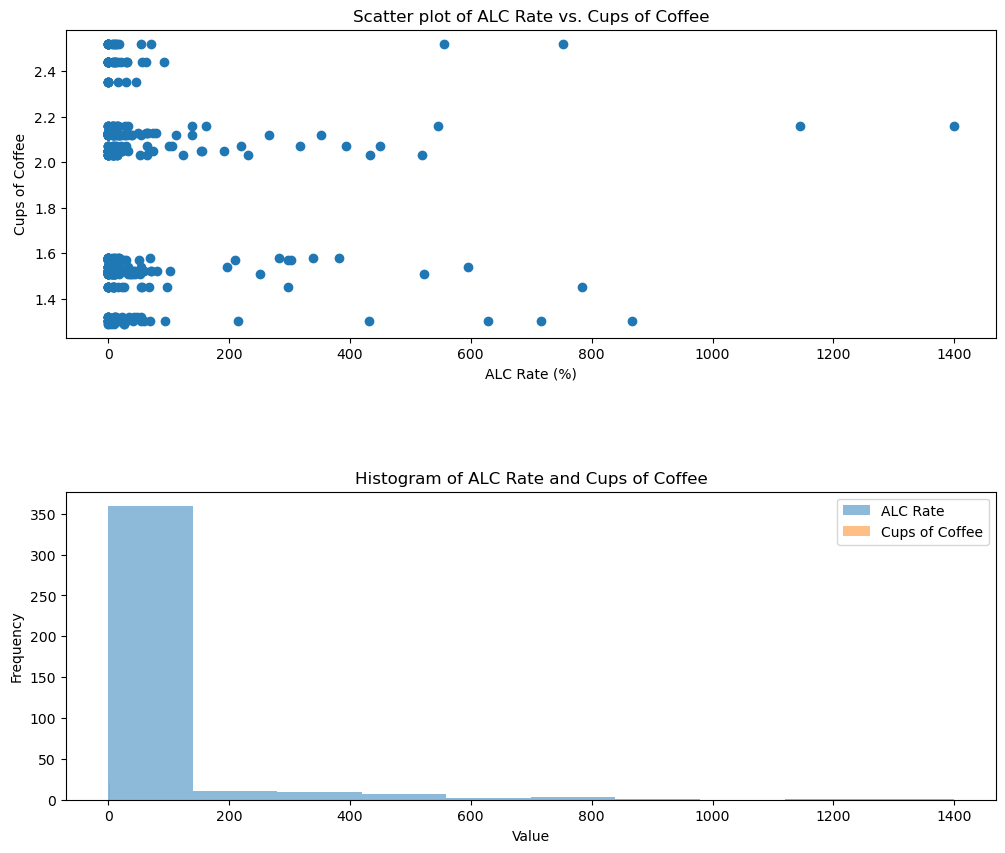

t-statistic: 6.996107545970081, p-value: 1.1403703931372206e-11


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(12, 10)) 

plt.subplot(2, 1, 1)
plt.scatter(merged_df['ALC Rate (%)'], merged_df['Cups of Coffee'])
plt.xlabel('ALC Rate (%)')
plt.ylabel('Cups of Coffee')
plt.title('Scatter plot of ALC Rate vs. Cups of Coffee')
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
plt.hist(merged_df['ALC Rate (%)'], alpha=0.5, label='ALC Rate')
plt.hist(merged_df['Cups of Coffee'], alpha=0.5, label='Cups of Coffee')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of ALC Rate and Cups of Coffee')
plt.show()

t_statistic, p_value = stats.ttest_ind(merged_df['ALC Rate (%)'], merged_df['Cups of Coffee'], equal_var=False)
print(f"t-statistic: {t_statistic}, p-value: {p_value}")


The scatter plot and histogram provided show the relationship between ALC Rate and cups of coffee consumed. 

From the data, a t-statistic of 6.996107545970081 and an associated p-value of 1.1403703931372206e-11 are observed.

 The p-value is considerably lower than the standard threshold of 0.05 for statistical significance.
 
 Indicating that there is a statistically significant difference between the ALC Rate and the number of cups of coffee consumed. The scatter plot.
 